<a href="https://colab.research.google.com/github/LazarevaL/wb_hw/blob/main/WB_DA_Python_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

100%|██████████| 146k/146k [00:00<00:00, 29.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2/shopping_trends.csv')

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Гипотезы #
####1. Дорогостоящие покупки (>75% percentile) чаще оплачивают кредиткой.####
####2. Молодые покупатели чаще альтернативными современными способами оплаты(PayPal).####
####3. В зимний период средний чек выше.####
###4. У покупатели с бОльшей историей покупой выше средний чек.###
###5. Для дорогих покупок пользователи чаще используют промокоды.###
###6. Пользователи с подпиской чаще покупают на платформе.###

In [20]:
#1.Дорогостоящие покупки (>75% percentile) чаще оплачивают кредиткой.

filtered_df = df[df['Purchase Amount (USD)'] > 81]
result_1 = filtered_df.groupby('Payment Method')['Purchase Amount (USD)'].count().reset_index()
result_1

,Payment Method,Purchase Amount (USD)
0,Bank Transfer,140
1,Cash,153
2,Credit Card,182
3,Debit Card,141
4,PayPal,138
5,Venmo,172


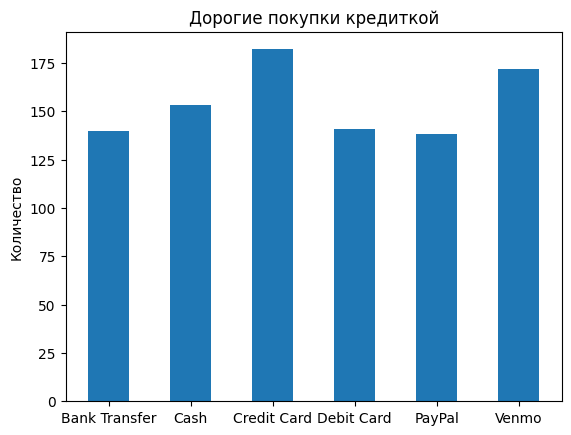

In [45]:
plt.bar(result_1['Payment Method'], result_1['Purchase Amount (USD)'], width = 0.5)
plt.ylabel("Количество")
plt.title("Дорогие покупки кредиткой")
plt.show()

Согласно графику, дейсвительно покупатели чаще опачивают покупки >81 доллара - а это 75% перцентиль,  кредиткой

In [56]:
#2. Молодые покупатели чаще пользуются более современными банковскими сервисами.

filtered_df = df[df['Age'] < 31]
result_2 = filtered_df.groupby('Payment Method')['Age'].count().reset_index()
result_2

,Payment Method,Age
0,Bank Transfer,158
1,Cash,151
2,Credit Card,158
3,Debit Card,162
4,PayPal,174
5,Venmo,146


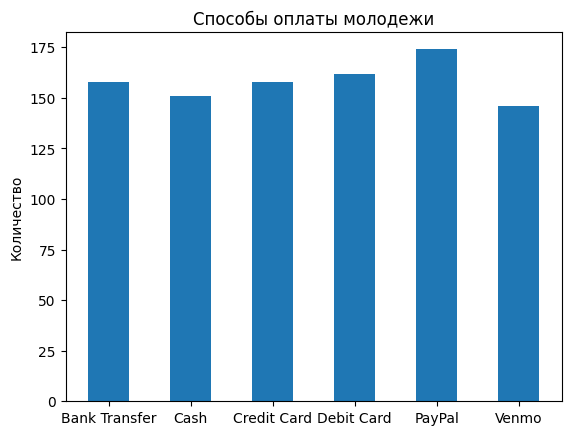

In [58]:
plt.bar(result_2['Payment Method'], result_2['Age'], width = 0.5)
plt.ylabel("Количество")
plt.title("Способы оплаты молодежи")
plt.show()

Дейсвительно так, люди до 31 года (25% перцентиль по возрасту) используют PayPal чуть чаще остальным способов оплаты. Это можно использовать для привлечения более молодой аудитории.

In [103]:
#В зимний период средний чек выше.

result_3 = df.groupby(['Season'])['Purchase Amount (USD)'].mean().reset_index()
result_3

,Season,Purchase Amount (USD)
0,Fall,61.556923
1,Spring,58.737738
2,Summer,58.405236
3,Winter,60.357364


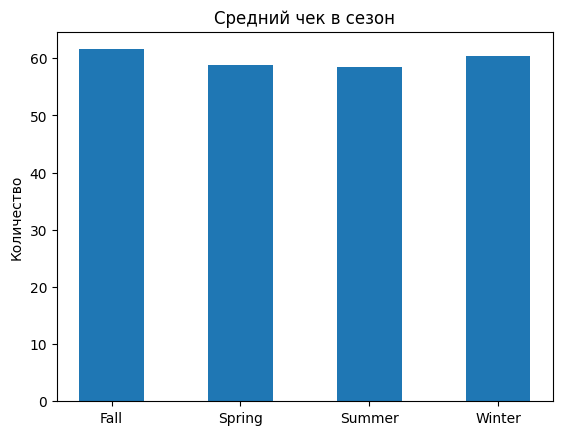

In [104]:
plt.bar(result_3['Season'], result_3['Purchase Amount (USD)'], width = 0.5)
plt.ylabel("Количество")
plt.title("Средний чек в сезон")
plt.show()

Странно, но гипотеза при визуальной проверке не подтвердилась, хотя обычно в зимний сезон люди больше покупают к праздникам.

In [120]:
#У покупателей с бОльшей историей покупой выше средний чек

percentiles = [0, 0.25, 0.5, 0.75, 1.0]
df['Percentile'] = pd.qcut(df['Previous Purchases'], q=percentiles, labels=[f'P{int(p*100)}' for p in percentiles[:-1]])
result_4 = df.groupby([ 'Percentile'])['Purchase Amount (USD)'].mean().reset_index()
result_4

<ipython-input-120-c8be62a261df>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_4 = df.groupby([ 'Percentile'])['Purchase Amount (USD)'].mean().reset_index()


,Percentile,Purchase Amount (USD)
0,P0,60.138067
1,P25,59.031546
2,P50,59.885799
3,P75,59.975216


Гипотеза не подтверждается, у пользователей с бОльшей историей покуппом на платформе средний чек не отличается.

In [137]:
#Для дорогих покупок пользователи чаще используют промокоды

filtered_df = df[df['Purchase Amount (USD)'] > 81]
result_5 = filtered_df.groupby(['Promo Code Used'])['Purchase Amount (USD)'].count().reset_index()
result_5

,Promo Code Used,Purchase Amount (USD)
0,No,547
1,Yes,424


Данная гипотеза также не подтвердилась, даже в пересчете использования промокодов относительно, поскольку эта категория не сбалансирована.

In [141]:
#Пользователи с подпиской чаще покупают на платформе

result_6 = df.groupby(['Frequency of Purchases'])['Subscription Status'].count().reset_index()
result_6

,Frequency of Purchases,Subscription Status
0,Annually,572
1,Bi-Weekly,547
2,Every 3 Months,584
3,Fortnightly,542
4,Monthly,553
5,Quarterly,563
6,Weekly,539


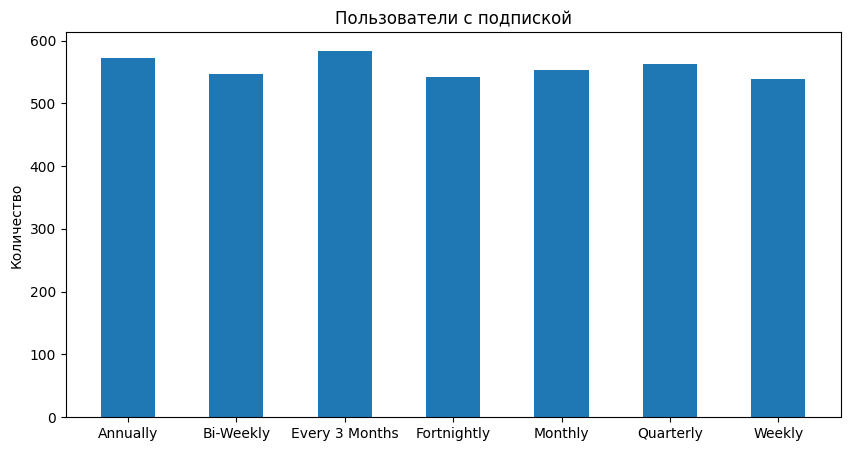

In [144]:
fig = plt.figure(figsize = (10, 5))
plt.bar(result_6['Frequency of Purchases'], result_6['Subscription Status'], width = 0.5)
plt.ylabel("Количество")
plt.title("Пользователи с подпиской")
plt.show()

Гипотеза также не подтвердилась, пользователи с подпиской чаще всего делают заказы раз в 3 месяца, а не еженедельно. Возможно это пользователи, которые забыли о подписке или у них включено автосписание за подписку.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

In [147]:
#найдите самый популярный товар

product_counts = df['Item Purchased'].value_counts()
product_counts.head(5)

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


Самый популярный товар - блуза,  а также украшения и штаны.

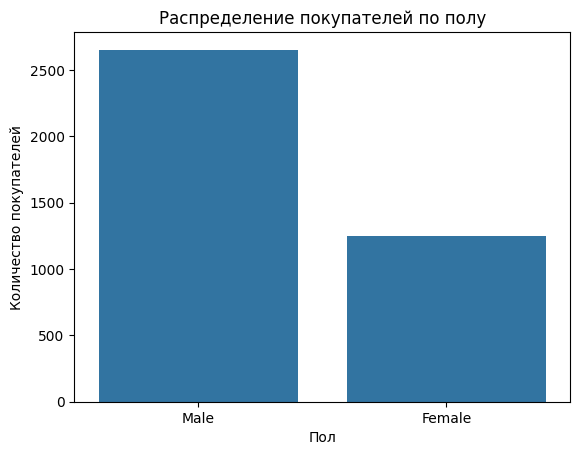

In [154]:
#постройте распределение покупателей по полу

sns.countplot(x='Gender', data=df)
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.show()

In [157]:
# определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

res1 = df.groupby(['Gender'])['Purchase Amount (USD)'].mean().reset_index()
res1
#существенной разницы в среднем чеке по полу нет

,Gender,Purchase Amount (USD)
0,Female,60.249199
1,Male,59.536199


In [160]:
quant_age = df['Age'].quantile(np.arange(0, 1.1, 0.1))
df['Age group'] = pd.cut(df['Age'], bins=quant_age, labels=['18-23', '23-28', '28-33', '33-39', '39-44', '44-49', '49-55', '55-60', '60-65', '65-70'], right=False)

In [168]:
res2 = df.groupby(['Age group'])['Purchase Amount (USD)'].mean().reset_index()
res2

<ipython-input-168-e9a67d1469b0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res2 = df.groupby(['Age group'])['Purchase Amount (USD)'].mean().reset_index()


,Age group,Purchase Amount (USD)
0,18-23,60.340058
1,23-28,59.478723
2,28-33,61.077519
3,33-39,60.023585
4,39-44,58.233766
5,44-49,57.130178
6,49-55,63.165591
7,55-60,58.194872
8,60-65,59.279778
9,65-70,60.233333


<ipython-input-167-d649b8db681e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res2 = df.groupby(['Age group'])['Purchase Amount (USD)'].mean().reset_index()


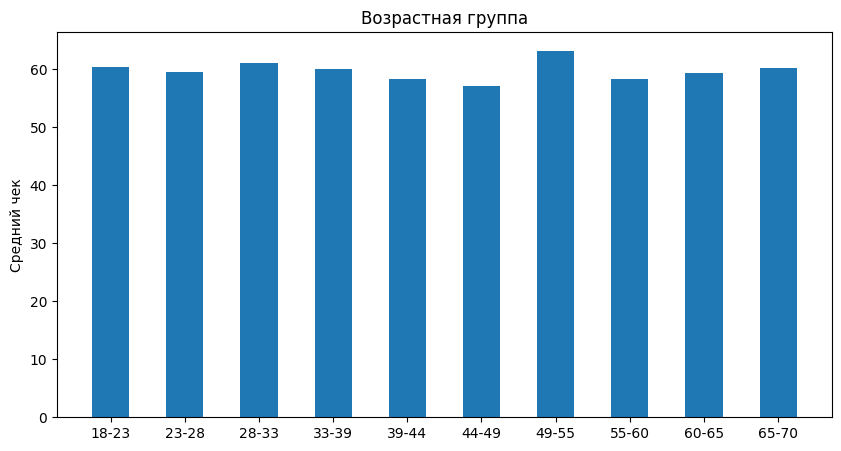

In [167]:
fig = plt.figure(figsize = (10, 5))
plt.bar(res2['Age group'], res2['Purchase Amount (USD)'], width = 0.5)
plt.ylabel("Средний чек")
plt.title("Возрастная группа")
plt.show()
#самый большой средний чек ввозрастной группе 49-55

In [170]:
res3 = df.groupby(['Age group'])['Purchase Amount (USD)'].count().reset_index()
res3
#и чаще всего делают покупки они же

<ipython-input-170-1c8ec0310b4c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res3 = df.groupby(['Age group'])['Purchase Amount (USD)'].count().reset_index()


,Age group,Purchase Amount (USD)
0,18-23,347
1,23-28,376
2,28-33,387
3,33-39,424
4,39-44,385
5,44-49,338
6,49-55,465
7,55-60,390
8,60-65,361
9,65-70,360


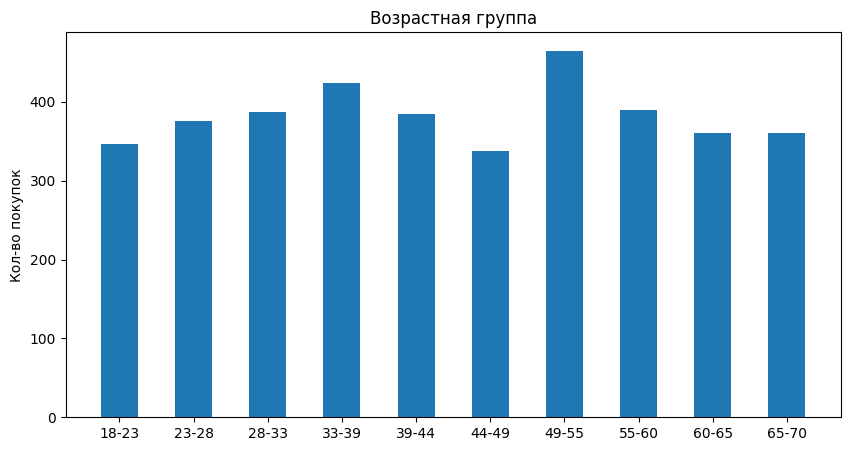

In [173]:
fig = plt.figure(figsize = (10, 5))
plt.bar(res3['Age group'], res3['Purchase Amount (USD)'], width = 0.5)
plt.ylabel("Кол-во покупок")
plt.title("Возрастная группа")
plt.show()

In [172]:
#дорогими считаю покупки, стоимость которых > 75% percentile
filtered_df = df[df['Purchase Amount (USD)'] > 81]
res4 = filtered_df.groupby(['Age group'])['Purchase Amount (USD)'].count().reset_index()
res4
#и снова возрастаня гурппа 49-55 покупают самые дорогие товары

<ipython-input-172-02b36c386583>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res4 = filtered_df.groupby(['Age group'])['Purchase Amount (USD)'].count().reset_index()


,Age group,Purchase Amount (USD)
0,18-23,83
1,23-28,86
2,28-33,96
3,33-39,103
4,39-44,81
5,44-49,70
6,49-55,133
7,55-60,84
8,60-65,89
9,65-70,89


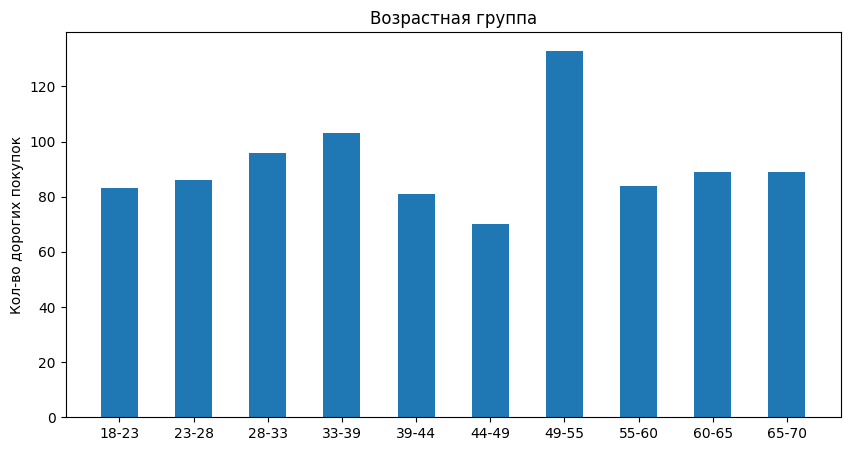

In [174]:
fig = plt.figure(figsize = (10, 5))
plt.bar(res4['Age group'], res4['Purchase Amount (USD)'], width = 0.5)
plt.ylabel("Кол-во дорогих покупок")
plt.title("Возрастная группа")
plt.show()

In [176]:
#определите, есть ли зависимость между цветом одежды и сезоном.

colors = pd.crosstab(df['Color'], df['Season'])
print(colors)

Season     Fall  Spring  Summer  Winter
Color                                  
Beige        34      39      37      37
Black        42      43      42      40
Blue         32      39      46      35
Brown        35      33      33      40
Charcoal     32      42      36      43
Cyan         43      42      42      39
Gold         36      38      30      34
Gray         44      48      40      27
Green        37      38      44      50
Indigo       37      37      32      41
Lavender     38      32      39      38
Magenta      50      37      35      30
Maroon       40      39      35      44
Olive        47      52      35      43
Orange       45      39      37      33
Peach        42      38      24      45
Pink         35      44      29      45
Purple       37      43      38      33
Red          42      31      36      39
Silver       39      37      59      38
Teal         40      46      49      37
Turquoise    27      41      36      41
Violet       44      45      40      37


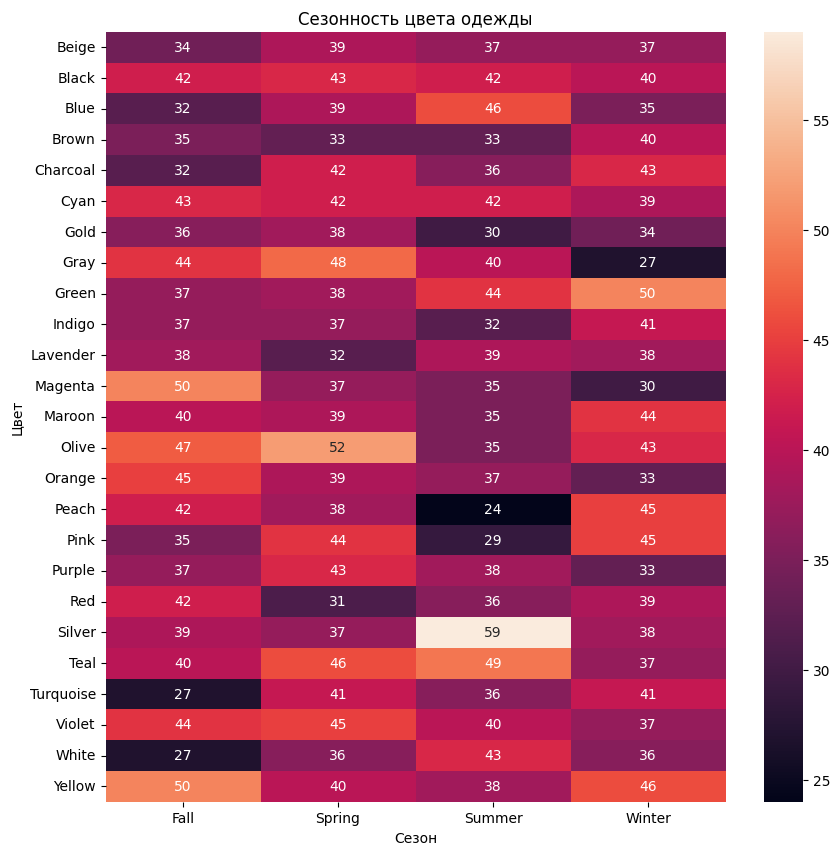

In [184]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(colors, annot=True)
plt.title('Сезонность цвета одежды')
plt.xlabel('Сезон')
plt.ylabel('Цвет')
plt.show()

Сезонный спрос на вещи определенных оттенков дейсвительно наблюдается: зимой самые популярные - зеленый, желтый, розовый, весной - оливковый и серый, летом - серебристый, синий, бирюзовый, а осенью - желтый и маджента.

In [186]:
#посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику

#в датасете все пользователи уникальны изначально
mau = df.groupby('Season')['Customer ID'].nunique().reset_index()
mau

,Season,Customer ID
0,Fall,975
1,Spring,999
2,Summer,955
3,Winter,971


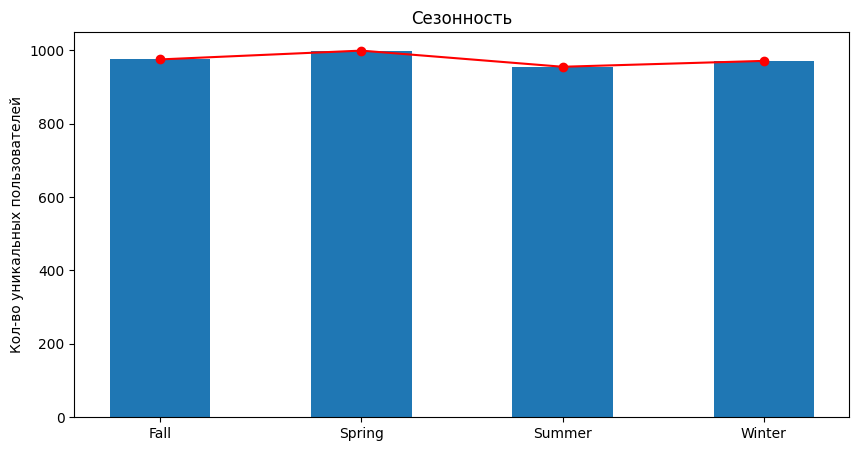

In [191]:
fig = plt.figure(figsize = (10, 5))
plt.bar(mau['Season'], mau['Customer ID'], width = 0.5)
plt.plot(mau['Season'], mau['Customer ID'], color='red', marker='o')
plt.ylabel("Кол-во уникальных пользователей")
plt.title("Сезонность")
plt.show()

In [200]:
#найдите самую популярную букву в названии одежды.

clothes = df[df['Category'] == 'Clothing']['Item Purchased'].unique()
clothes

array(['Blouse', 'Sweater', 'Jeans', 'Shirt', 'Shorts', 'Dress', 'Skirt',
       'Pants', 'Hoodie', 'T-shirt', 'Socks'], dtype=object)

In [210]:
all_text = ''.join(clothes)
letters = pd.Series(list(all_text))
letters

,0
0,B
1,l
2,o
3,u
4,s
...,...
57,S
58,o
59,c
60,k


In [214]:
letter_counts = letters.value_counts()
most_popular_letter = letter_counts.idxmax()

print("Самая популярная буква:", most_popular_letter)

Самая популярная буква: s


<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [3]:
drinks = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/alcohol-consumption/drinks.csv")

In [4]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [25]:
#топ5 стран по общему потреблению алкоголя

top_5_total = drinks.sort_values(by = 'total_litres_of_pure_alcohol', ascending = False).head(5)
top_5_total

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
45,Czech Republic,361,170,134,11.8


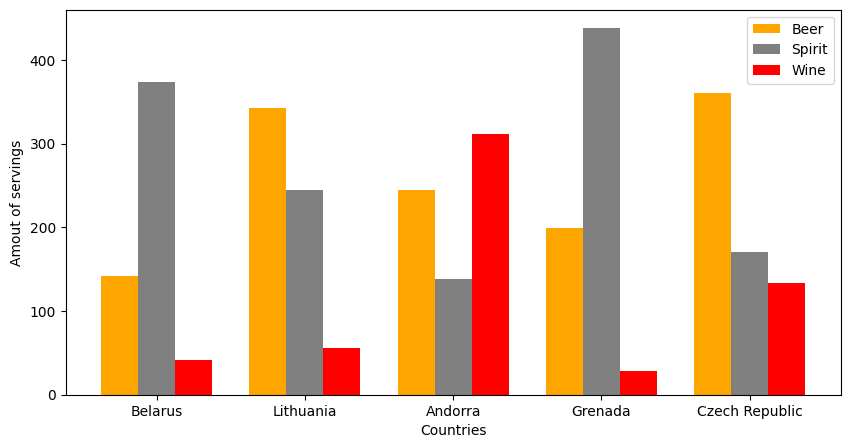

In [68]:
#распределение видов алкоголя для топ5 наиболее пьющих стран
x = np.arange(len(top_5_total))
width = 0.25
fig = plt.figure(figsize = (10, 5))

plt.bar(x-0.25, top_5_total['beer_servings'], width, color='orange')
plt.bar(x, top_5_total['spirit_servings'], width, color='grey')
plt.bar(x+0.25, top_5_total['wine_servings'], width, color='red')
plt.xticks(x, top_5_total['country'])
plt.xlabel("Countries")
plt.ylabel("Amout of servings")
plt.legend(["Beer", "Spirit", "Wine"])
plt.show()

In [27]:
#топ5 стран по потреблению пива

top_5_beer = drinks.sort_values(by = 'beer_servings', ascending = False).head(5)
top_5_beer

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9


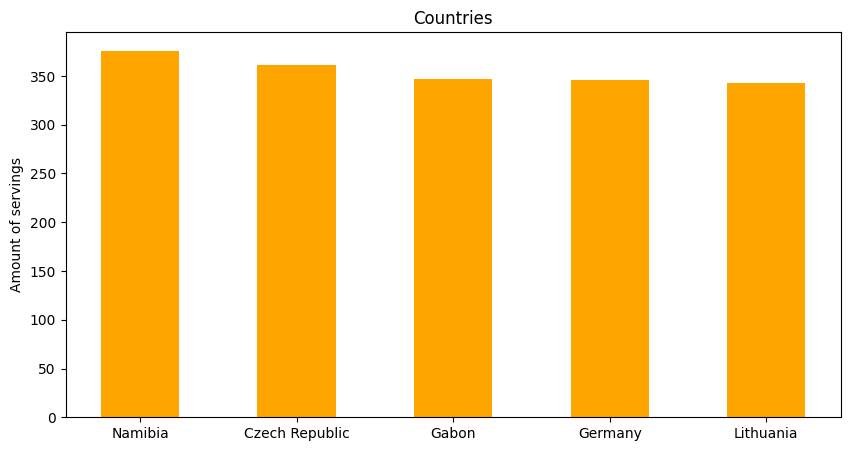

In [31]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_5_beer['country'], top_5_beer['beer_servings'], width = 0.5, color = 'orange')
plt.ylabel("Amount of servings")
plt.title("Countries")
plt.show()

In [34]:
#топ5 стран по потреблению крепкого алкголя

top_5_spirit = drinks.sort_values(by = 'spirit_servings', ascending = False).head(5)
top_5_spirit

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
73,Haiti,1,326,1,5.9
141,Russian Federation,247,326,73,11.5
144,St. Lucia,171,315,71,10.1


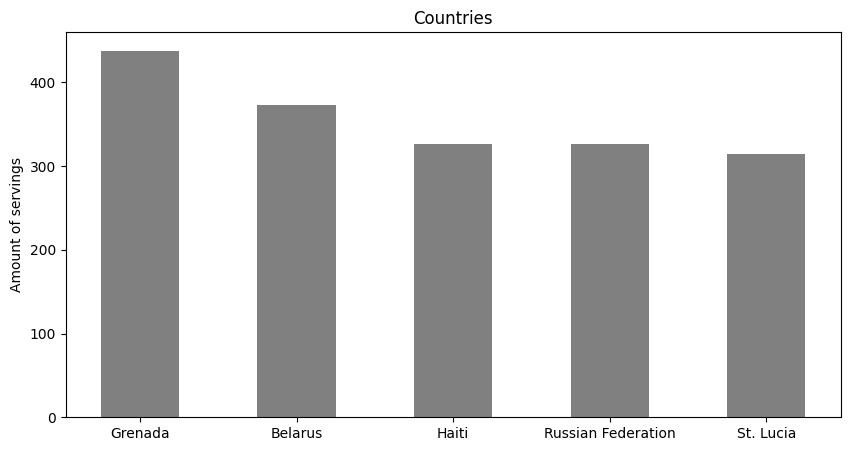

In [36]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_5_spirit['country'], top_5_spirit['spirit_servings'], width = 0.5, color = 'grey')
plt.ylabel("Amount of servings")
plt.title("Countries")
plt.show()

In [37]:
#топ5 стран по потреблению вина

top_5_wine = drinks.sort_values(by = 'wine_servings', ascending = False).head(5)
top_5_wine

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4


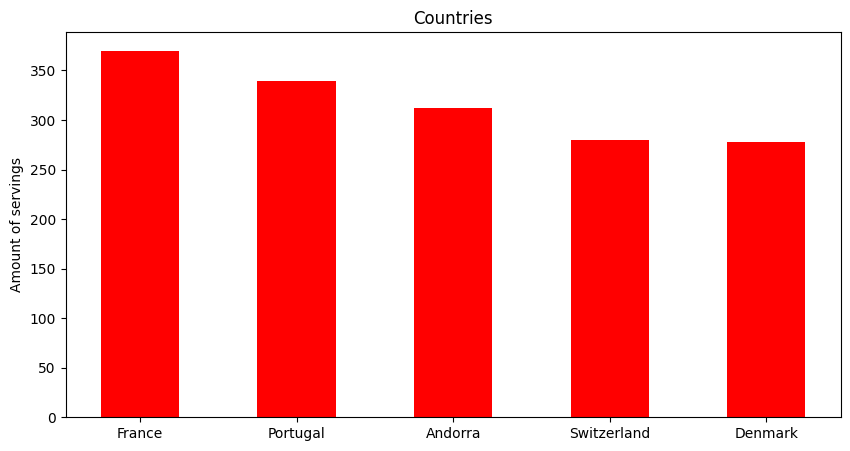

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_5_wine['country'], top_5_wine['wine_servings'], width = 0.5, color = 'red')
plt.ylabel("Amount of servings")
plt.title("Countries")
plt.show()

Итак, больше всего алкоголя суммарно в литрах употребляют в Беларуси, Литве и Андорре, пиво популярнее в Намибии, Чехии и Габоне, крепкие напитки предпочитают в Гренаде, Беларуси и Гаити, а вино чаще всего выбирают во Франции, Португалии и Андорре.

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [39]:
films = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/tarantino/tarantino.csv")

In [40]:
films.head(5)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [41]:
films['type'].value_counts()

,count
type,
word,1704
death,190


In [42]:
films['movie'].value_counts()

,count
movie,
Pulp Fiction,476
Reservoir Dogs,431
Jackie Brown,372
Django Unchained,309
Kill Bill: Vol. 1,120
Inglorious Basterds,106
Kill Bill: Vol. 2,80


In [58]:
deaths_5 = films[films['type']=='death'].groupby(['movie']).count().reset_index().sort_values(by = 'type', ascending = False)
deaths_5

,movie,type,word,minutes_in
3,Kill Bill: Vol. 1,63,0,63
1,Inglorious Basterds,48,0,48
0,Django Unchained,47,0,47
4,Kill Bill: Vol. 2,11,0,11
6,Reservoir Dogs,10,0,10
5,Pulp Fiction,7,0,7
2,Jackie Brown,4,0,4


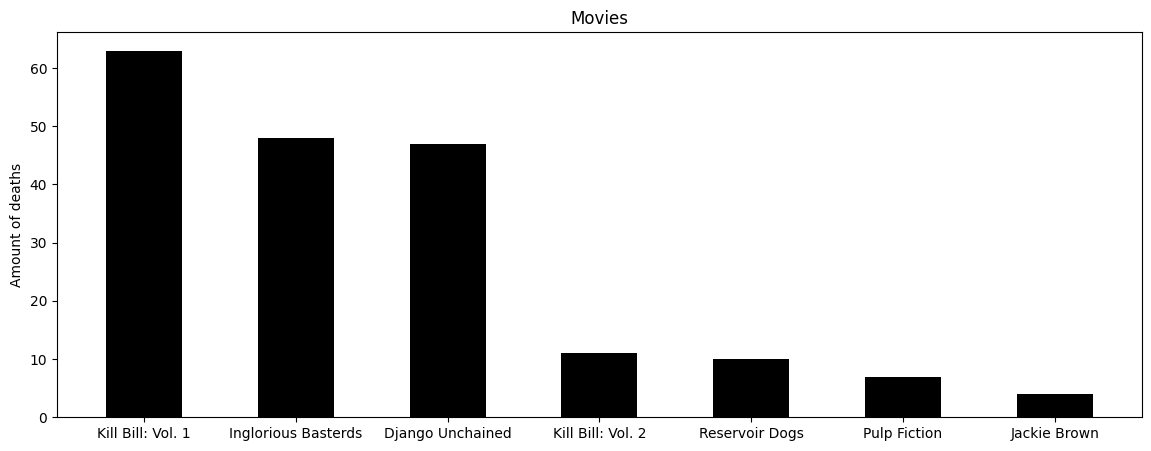

In [63]:
#топ фильмов по количеству смертей
fig = plt.figure(figsize = (14, 5))
plt.bar(deaths_5['movie'], deaths_5['type'], width = 0.5, color = 'black')
plt.ylabel("Amount of deaths")
plt.title("Movies")
plt.show()

#больше всего смертей в фильме Убить Билла 1 (Ума Турман убила Билла и еще 62 человека)

In [60]:
curses_5 = films[films['type']=='word'].groupby(['movie']).count().reset_index().sort_values(by = 'type', ascending = False)
curses_5

,movie,type,word,minutes_in
5,Pulp Fiction,469,469,469
6,Reservoir Dogs,421,421,421
2,Jackie Brown,368,368,368
0,Django Unchained,262,262,262
4,Kill Bill: Vol. 2,69,69,69
1,Inglorious Basterds,58,58,58
3,Kill Bill: Vol. 1,57,57,57


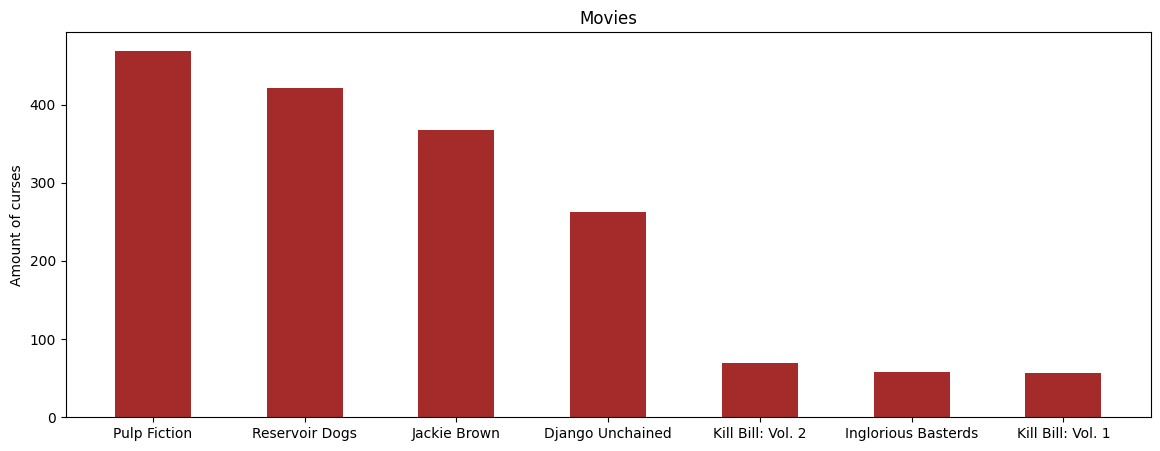

In [62]:
#топ фильмов по количеству ругательств
fig = plt.figure(figsize = (14, 5))
plt.bar(curses_5['movie'], curses_5['type'], width = 0.5, color = 'brown')
plt.ylabel("Amount of curses")
plt.title("Movies")
plt.show()

#самый насыщенный ругательствами фильм - Криминальное чтиво

In [80]:
total = films.groupby(['movie']).count().reset_index()
total['deaths'] = total['type'] - total['word']
total['rate'] = total['type']/total['deaths']
total.sort_values(by = 'rate', ascending = False, inplace = True)

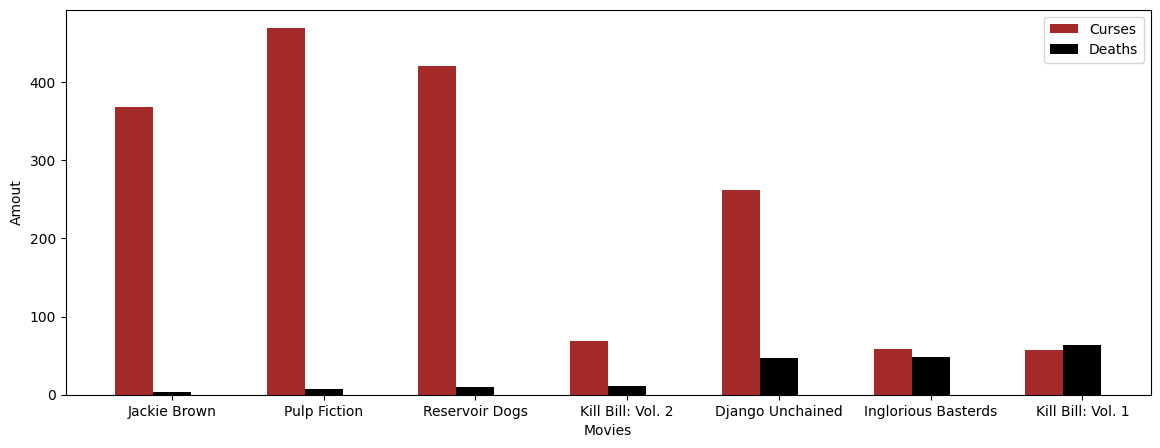

In [81]:
#сравниетльный абсолютный график ругательств и смертей по фильмам
x = np.arange(len(total))
width = 0.25
fig = plt.figure(figsize = (14, 5))

plt.bar(x-0.25, total['word'], width, color='brown')
plt.bar(x, total['deaths'], width, color='black')
plt.xticks(x, total['movie'])
plt.xlabel("Movies")
plt.ylabel("Amout")
plt.legend(["Curses", "Deaths"])
plt.show()

In [87]:
total_curses = films[films['type']== 'word'].groupby(['word']).count().reset_index().sort_values(by = 'movie', ascending = False)
total_curses.head(5)

,word,movie,type,minutes_in
28,fucking,407,407,407
49,shit,221,221,221
22,fuck,213,213,213
46,n-word,179,179,179
0,ass,140,140,140


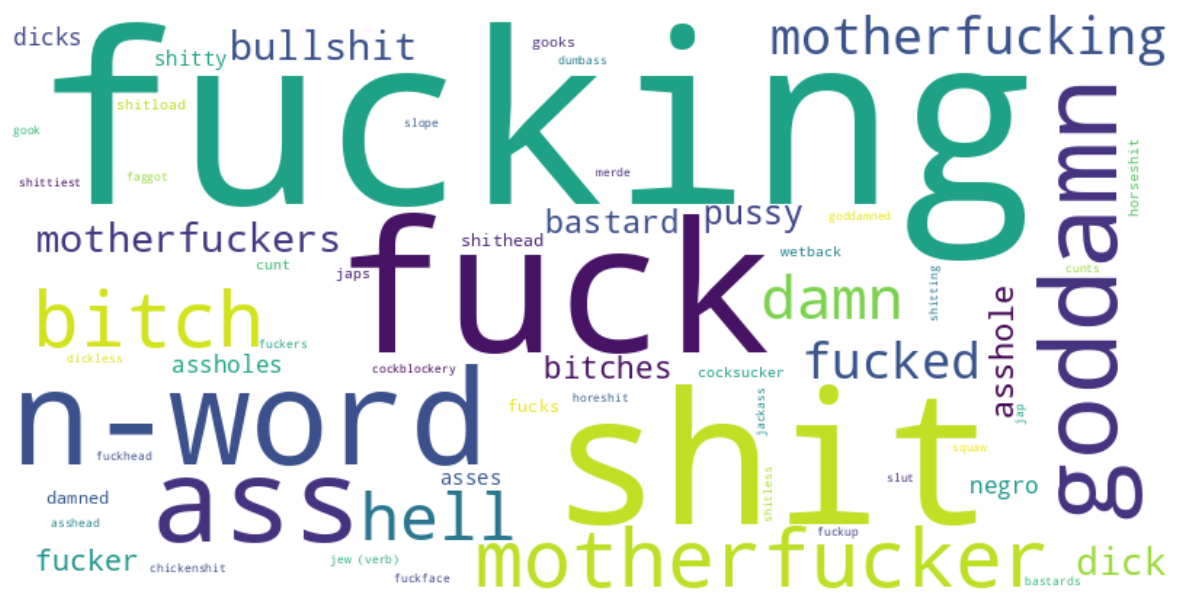

In [97]:
#облако оскорблений
from wordcloud import WordCloud

word_freq = dict(zip(total_curses['word'], total_curses['movie']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

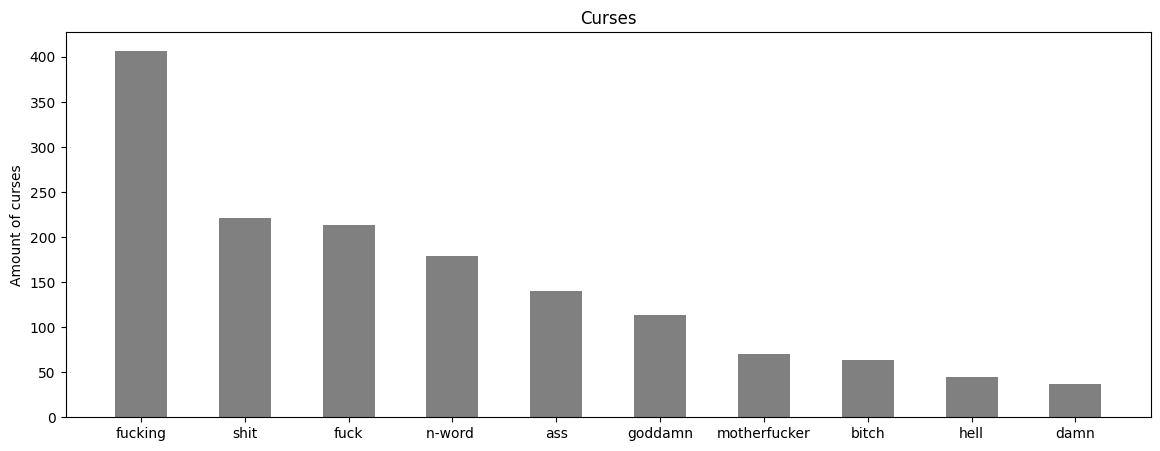

In [101]:
#и более классический график для частоты употребления плохих слов

fig = plt.figure(figsize = (14, 5))
plt.bar(total_curses['word'].head(10), total_curses['movie'].head(10), width = 0.5, color = 'grey')
plt.ylabel("Amount of curses")
plt.title("Curses")
plt.show()

In [108]:
curses_1 = films[films['type'] == 'word'].sort_values([ 'minutes_in']).reset_index()
curses_1['minutes_diff'] = curses_1.groupby('movie')['minutes_in'].diff()
curses_1.dropna(inplace = True)
curses_1.sort_values(by = 'minutes_diff', ascending = False, inplace = True)

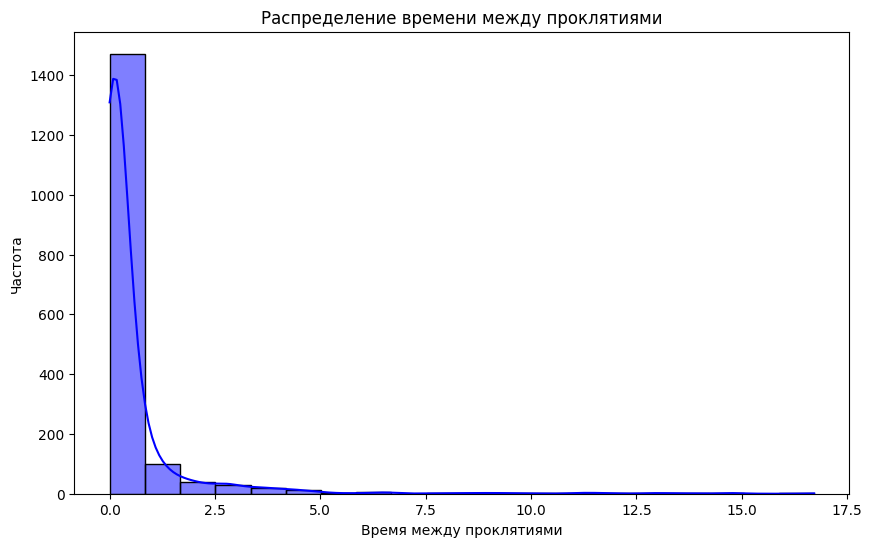

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(curses_1['minutes_diff'], bins=20, kde=True, color='blue')
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями')
plt.ylabel('Частота')
plt.show()